In [13]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [5]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

In [6]:
model = Word2Vec(sentences, min_count=1)
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [7]:
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [8]:
print(model['sentence'])

[-0.00415118  0.00493232 -0.0007976   0.00167375  0.00446443  0.00491878
 -0.00300099 -0.0043528  -0.00038547 -0.00315614 -0.00057366  0.00319576
 -0.00322674  0.00477583  0.00125538  0.00450641  0.00454618 -0.00287638
  0.00200285 -0.00416465 -0.00245342 -0.00166704 -0.00453534  0.00494095
 -0.00053345 -0.00039728  0.00215863 -0.00181441  0.00410867  0.00040333
  0.00479227  0.00175803 -0.00453704  0.00271805 -0.00383548  0.00263287
 -0.0029488  -0.00360184 -0.00029923 -0.00492981  0.00113576 -0.00273517
 -0.00087138 -0.00395857 -0.00177392  0.00322064 -0.00282177  0.00370001
  0.00462576 -0.00429208 -0.00452349  0.00320723 -0.00077674 -0.00403743
 -0.00385487  0.00032837  0.00417019  0.00470006  0.00027346  0.00281443
  0.0033643   0.00391048  0.00085761 -0.00235876  0.00094214  0.00322533
  0.003741   -0.00442406 -0.00140825  0.00033609  0.0003913   0.00399221
 -0.00155596 -0.00231538  0.00089025  0.00121886 -0.00041704  0.00362585
  0.00204679 -0.00264264 -0.00114108 -0.00404653 -0

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [9]:
model.save('datasets/model.bin')

In [11]:
new_model = Word2Vec.load('datasets/model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [12]:
X = model[model.wv.vocab]

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


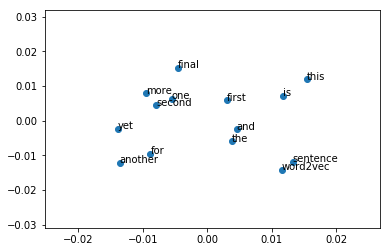

In [15]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [16]:
#Loading Google Word2vec

In [20]:
from gensim.models import KeyedVectors

In [21]:
filename = 'datasets/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [23]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn= 1)
print(result)

[('queen', 0.7118192911148071)]


In [24]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [25]:
glove_input_file = 'datasets/glove6b/glove.6B.100d.txt'
word2vec_output_file = 'datasets/glove6b/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [26]:
filename = 'datasets/glove6b/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [27]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn= 1)
print(result)

[('queen', 0.7698541283607483)]
